# Level-0

In [11]:
import numpy as np
from sklearn import preprocessing

input_data = np.array([[1,2,-3],
                       [4,5,6],
                       [7,8,-9]])
# Binarize data 
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[0 0 0]
 [1 1 1]
 [1 1 0]]


# Level-1

In [12]:

# Min max scaling
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nMin max scaled data:\n", data_scaled_minmax)

# Input Data Normalization
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
print("\nL1 normalized data:\n", data_normalized_l1)



Min max scaled data:
 [[0.  0.  0.4]
 [0.5 0.5 1. ]
 [1.  1.  0. ]]

L1 normalized data:
 [[ 0.16666667  0.33333333 -0.5       ]
 [ 0.26666667  0.33333333  0.4       ]
 [ 0.29166667  0.33333333 -0.375     ]]


# Level-2

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("loan_status_new.csv")

In [14]:
df.dropna(inplace=True)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Married'] = LabelEncoder().fit_transform(df['Married'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Self_Employed'] = LabelEncoder().fit_transform(df['Self_Employed'])
df['Property_Area'] = LabelEncoder().fit_transform(df['Property_Area'])
df['Loan_Status'] = LabelEncoder().fit_transform(df['Loan_Status'])
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Level-3

In [16]:
# Define sample input data
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [17]:
from sklearn.svm import SVC
model_01 = SVC()
model_01.fit(x_train, y_train)
print(classification_report(y, model_01.predict(X),digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.0130    0.0256       154
           1     0.6885    1.0000    0.8155       336

    accuracy                         0.6898       490
   macro avg     0.8443    0.5065    0.4206       490
weighted avg     0.7864    0.6898    0.5673       490



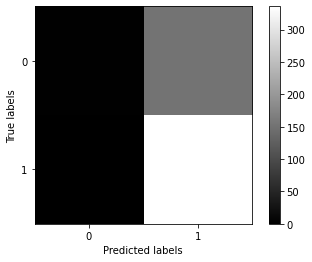

In [18]:
confusion_mat = confusion_matrix(y, model_01.predict(X))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
#plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [19]:
model = GaussianNB()
model.fit(x_train, y_train)
print(classification_report(y, model.predict(X),digits=4))

              precision    recall  f1-score   support

           0     0.7959    0.5065    0.6190       154
           1     0.8061    0.9405    0.8681       336

    accuracy                         0.8041       490
   macro avg     0.8010    0.7235    0.7436       490
weighted avg     0.8029    0.8041    0.7898       490



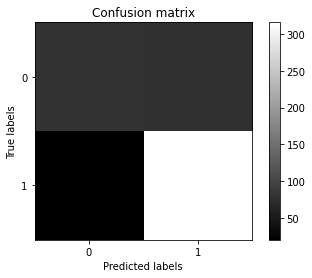

In [20]:
confusion_mat = confusion_matrix(y, model.predict(X))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()